# Clean data

In [177]:
import pandas as pd
import utils
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
df = pd.read_csv("sp500-info.csv", index_col="Date", parse_dates=True)
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,62.521873,10.25,76.780159,55.566658,58.500195,71.623451,132.339996,60.947273,139.870514,307.269989,...,57.570000,48.351284,27.525692,31.492746,55.360428,54.530045,77.300705,170.720001,23.084974,91.612640
2020-03-24,66.103294,13.92,84.487518,61.141407,61.212063,77.358749,143.669998,67.612480,152.680710,310.000000,...,66.559998,52.267742,31.017820,33.378361,60.599335,67.207420,89.343971,180.550003,24.139519,102.587173
2020-03-25,68.076515,15.39,88.390114,60.804588,61.593002,72.999146,146.889999,68.640869,147.784409,305.910004,...,75.059998,53.718277,32.636982,34.553169,62.417316,70.304398,92.625023,186.229996,24.781836,106.986877
2020-03-26,72.733368,15.66,94.992233,64.004311,66.962318,81.534279,149.169998,73.550034,166.785522,322.670013,...,71.510002,56.000458,33.976070,39.008453,66.473564,73.083000,96.717361,197.509995,26.239023,116.577225
2020-03-27,69.960960,14.04,93.505516,61.354385,65.910217,79.228539,145.240005,72.337288,158.550430,305.829987,...,63.310001,56.832096,32.339405,37.553059,64.020264,66.117195,91.049530,184.570007,26.440346,110.506630


In [178]:
print(sum(df.isna().sum() != 0), "stock(s) don't have enough value.")

1 stock(s) don't have enough value.


In [179]:
df_clean = utils.clean_data(df, out_df_dir="sp500_clean.csv")

# Calcualte correlation

In [180]:
df_cor = utils.calculate_cor(df_clean)
df_cor

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.228658,0.408459,0.485315,0.425976,0.376006,0.477572,0.553577,0.615949,0.558828,...,0.304552,0.396801,0.285174,0.414267,0.522816,0.453308,0.497676,0.579861,0.256110,0.635681
AAL,0.228658,1.000000,0.348342,0.144835,0.149454,0.217025,0.197697,0.050246,0.274489,0.024126,...,0.607609,0.073972,0.525854,0.427635,0.454563,0.407808,0.475545,0.282946,0.569402,0.139329
AAP,0.408459,0.348342,1.000000,0.282340,0.352156,0.466897,0.193020,0.240516,0.495984,0.242211,...,0.410499,0.383182,0.414429,0.459291,0.531980,0.539612,0.466581,0.395938,0.463267,0.439188
AAPL,0.485315,0.144835,0.282340,1.000000,0.287115,0.233277,0.376081,0.379212,0.492511,0.640283,...,0.243681,0.336923,0.195442,0.214263,0.315724,0.367108,0.326701,0.465619,0.096150,0.528751
ABBV,0.425976,0.149454,0.352156,0.287115,1.000000,0.451479,0.202542,0.430762,0.443115,0.284849,...,0.196202,0.303723,0.329896,0.377381,0.244812,0.315940,0.383321,0.289944,0.214126,0.445858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.453308,0.407808,0.539612,0.367108,0.315940,0.421449,0.329564,0.355763,0.554748,0.274348,...,0.496393,0.483889,0.453396,0.447915,0.556221,1.000000,0.535393,0.437699,0.375418,0.553996
ZBH,0.497676,0.475545,0.466581,0.326701,0.383321,0.448002,0.423736,0.368674,0.532003,0.253191,...,0.595069,0.379580,0.531372,0.590481,0.550445,0.535393,1.000000,0.448835,0.526298,0.454020
ZBRA,0.579861,0.282946,0.395938,0.465619,0.289944,0.312402,0.339318,0.342625,0.578366,0.497023,...,0.382596,0.275842,0.354440,0.375406,0.514489,0.437699,0.448835,1.000000,0.363572,0.489918
ZION,0.256110,0.569402,0.463267,0.096150,0.214126,0.407717,0.122488,0.071087,0.379786,-0.043763,...,0.590225,0.198789,0.670809,0.581937,0.584855,0.375418,0.526298,0.363572,1.000000,0.117257


# Create quantile and mean, variance of correlation values

In [181]:
code = df_cor.columns.values.tolist()

In [198]:
n = len(code) # number of stock
QUANTILE = 0.6827 # 1 std
#QUANTILE = (0.9545+1)/2 # 2 std

correlation = []
for i in range(n):
    for j in range(n):
        if  i>j:
            correlation.append(df_cor.iloc[i].iloc[j])

npcorrelation = np.asarray(correlation)
threshold = np.quantile(npcorrelation, QUANTILE)
threshold


0.4670260855027386

In [210]:
g = nx.Graph()

for item in code:
    g.add_node(item)
    
for u in g.nodes:
    for v in g.nodes:
        if u != v and df_cor[u][v] > 0.55:
            g.add_edge(u, v)


In [200]:
#nx.draw(g)

In [201]:
nx.write_adjlist(g, "stock_network_new.csv")

In [202]:
n_node = g.number_of_nodes()
n_link = g.number_of_edges()
avg_degree = 2*n_link/n_node

In [203]:
print(n_node)
print(n_link)
print(avg_degree)

503
40060
159.28429423459244


(array([   81,   798,  4702, 14201, 27912, 37017, 28799, 10881,  1657,
          205]),
 array([-0.32963108, -0.19774204, -0.065853  ,  0.06603605,  0.19792509,
         0.32981413,  0.46170317,  0.59359221,  0.72548125,  0.85737029,
         0.98925933]))

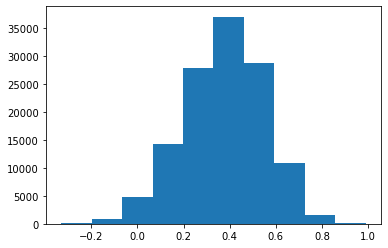

In [205]:
plt.hist(npcorrelation)
plt.show()

In [170]:
#nx.write_gexf(g, "test.gexf")

In [211]:
# Count node invovle in the connected comm
t = 0
de = g.degree
for item in de:
    if item[1] > 0:
        t=t+1
        
print(t)

464


[('A', 154), ('AAL', 148), ('AAP', 197), ('AAPL', 58), ('ABBV', 10), ('ABC', 59), ('ABMD', 7), ('ABT', 49), ('ACN', 277), ('ADBE', 64), ('ADI', 145), ('ADM', 299), ('ADP', 270), ('ADSK', 77), ('AEE', 86), ('AEP', 62), ('AES', 203), ('AFL', 276), ('AIG', 285), ('AIZ', 219), ('AJG', 246), ('AKAM', 2), ('ALB', 107), ('ALGN', 110), ('ALK', 233), ('ALL', 267), ('ALLE', 305), ('AMAT', 81), ('AMCR', 298), ('AMD', 28), ('AME', 353), ('AMGN', 10), ('AMP', 348), ('AMT', 81), ('AMZN', 26), ('ANET', 49), ('ANSS', 98), ('ANTM', 113), ('AON', 104), ('AOS', 138), ('APA', 123), ('APD', 145), ('APH', 357), ('APTV', 271), ('ARE', 145), ('ATO', 100), ('ATVI', 2), ('AVB', 216), ('AVGO', 154), ('AVY', 318), ('AWK', 85), ('AXP', 296), ('AZO', 117), ('BA', 248), ('BAC', 278), ('BAX', 11), ('BBWI', 119), ('BBY', 65), ('BDX', 1), ('BEN', 239), ('BF-B', 77), ('BIIB', 0), ('BIO', 27), ('BK', 242), ('BKNG', 223), ('BKR', 210), ('BLK', 287), ('BLL', 44), ('BMY', 7), ('BR', 205), ('BRK-B', 330), ('BRO', 260), ('BSX